**Mount data from google drive to avoid re-uploading in each run**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install vncorenlp

     |████████████████████████████████| 2.7MB 4.1MB/s 
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-cp36-none-any.whl size=2645936 sha256=ebc999e8fd25f8ff22c48601ddddb6594b5bb0e10f5fccd34535553a8db24376
  Stored in directory: /root/.cache/pip/wheels/09/54/8b/043667de6091d06a381d7745f44174504a9a4a56ecc9380c54
Successfully built vncorenlp


 **Import required libraries for text preprocessing**

In [ ]:
# import neccessary libraries
import numpy as np
import vncorenlp
import gensim
import pickle
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

**function get_data(folder_path) reads every .txt file of a folder, breaks this file into words and tokenizes these words**

In [ ]:
import os 
dir_path = os.path.dirname(os.path.realpath(os.getcwd()))

segmenter = vncorenlp.VnCoreNLP("/content/gdrive/MyDrive/svm content classification/VnCoreNLP-1.1.1/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') 

def get_data(folder_path):

  # define two lists to hold figures and labels of data
  X = []
  y = []

  # get the directory of the folder
  dirs = os.listdir(folder_path)

  # for each sub-folder ('Bong da', 'Thoi trang', 'Du lich', etc.) in the folder 
  for path in tqdm(dirs):

    # get all the files in this sub-folder in list 'file_paths'
    file_paths = os.listdir(os.path.join(folder_path, path))

    # for each file_path in the list 
    for file_path in tqdm(file_paths):

      # open the file with encoding='utf-16' to read vietnamese words
      with open(os.path.join(folder_path, path, file_path), 'r', encoding="utf-16") as f:

        # read all the lines of this file and save in list 'lines'
        lines = f.readlines()

        # join all the elements (line) in 'lines' into a string
        lines = ' '.join(lines)

        # preprocess line with library gensim
        lines = gensim.utils.simple_preprocess(lines)
        lines = ' '.join(lines)

        # tokenize the string 'lines' with Vncorenlp
        lines = segmenter.tokenize(lines)
        lines = ' '.join(lines[0])

        # append preprocessed lines into fearture columns
        X.append(lines)

        # append the name of the folder into the label column
        y.append(path)

  return X, y

In [ ]:
# define the path of the folder containing training data
train_path = os.path.join(dir_path, '/content/gdrive/MyDrive/svm content classification/new train')

# get the training data and break the it into the figures (X_data) and labels (y_data)
X_data, y_data = get_data(train_path)

# define the path of the folder containing testing data
test_path = os.path.join(dir_path, '/content/gdrive/MyDrive/svm content classification/new test')

# get the testing data and break the it into the figures (X_test) and labels (y_test)
X_test, y_test = get_data(test_path)

In [ ]:
import pickle

# save X_data, y_data in a pickle file to retrieve in the future without time-consuming re-run
pickle.dump(X_data, open('/content/gdrive/MyDrive/svm content classification/X_data.pkl', 'wb'))
pickle.dump(y_data, open('/content/gdrive/MyDrive/svm content classification/y_data.pkl', 'wb'))

In [ ]:
import pickle

# save X_test, y_test in a pickle file to retrieve in the future without time-consuming rerun
pickle.dump(X_test, open('/content/gdrive/MyDrive/svm content classification/X_test.pkl', 'wb'))
pickle.dump(y_test, open('/content/gdrive/MyDrive/svm content classification/y_test.pkl', 'wb'))

**Retrieve data for each rerun**

In [ ]:
import pickle

# retrieve X_data, y_data, X_test, y_
X_data = pickle.load(open('/content/gdrive/MyDrive/svm content classification/X_data.pkl', 'rb'))
y_data = pickle.load(open('/content/gdrive/MyDrive/svm content classification/y_data.pkl', 'rb'))
X_test = pickle.load(open('/content/gdrive/MyDrive/svm content classification/X_test.pkl', 'rb'))
y_test = pickle.load(open('/content/gdrive/MyDrive/svm content classification/y_test.pkl', 'rb'))

**store all vietnamese stopwords for preprocessing**

In [ ]:
stopwords = []

# open file .txt contains vietnamese stopwords
with open ('/content/gdrive/MyDrive/svm content classification/vietnamese-stopwords.txt', 'r', encoding='utf-8') as f:
  while True:
    word = f.readline()
    if not word: break
    stopwords.append(word[:-1])

print(stopwords)

['bị', 'bởi', 'cả', 'các', 'cái', 'cần', 'càng', 'chỉ', 'chiếc', 'cho', 'chứ', 'chưa', 'chuyện', 'có', 'có thể', 'cứ', 'của', 'cùng', 'cũng', 'đã', 'đang', 'đây', 'để', 'đến nỗi', 'đều', 'điều', 'do', 'đó', 'được', 'dưới', 'gì', 'khi', 'không', 'là', 'lại', 'lên', 'lúc', 'mà', 'mỗi', 'một cách', 'này', 'nên', 'nếu', 'ngay', 'nhiều', 'như', 'nhưng', 'những', 'nơi', 'nữa', 'phải', 'qua', 'ra', 'rằng', 'rất', 'rồi', 'sau', 'sẽ', 'so', 'sự', 'tại', 'theo', 'thì', 'trên', 'trước', 'từ', 'từng', 'và', 'vẫn', 'vào', 'vậy', 'vì', 'việc', 'với', 'vừa', 'nhận', 'cao', 'nhà', 'quá', 'riêng', 'muốn', 'số', 'thấy', 'hay', 'lần', 'nào', 'bằng', 'biết', 'lớn', 'khác', 'thời gian', 'họ', 'tháng', 'chính', 'nói', 'đi', 'tới', 'tôi', 'làm', 'mới', 'ngày', 'mình', 'còn', 'năm', 'nhất', 'hơn', 'ông', 'anh', 'đến', 'người', 'ở', 'về', 'một', 'trong', 'thực sự', 'ở trên', 'tất cả', 'hầu hết', 'luôn', 'giữa', 'bất kỳ', 'hỏi', 'bạn', 'cô', 'tớ', 'cậu', 'bác', 'chú', 'dì', 'thím', 'mợ', 'bà', 'em', 'thường', '

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# apply TF-IDF technique into vectorizing words
tfidf_vect = TfidfVectorizer(analyzer='word', stop_words=stopwords, min_df=10, max_df=0.9)

# apply into training data to create vocabulary 
tfidf_vect.fit(X_data)

# TF-IDF X_data
X_data_tfidf =  tfidf_vect.transform(X_data)

# TF-IDF X_test
X_test_tfidf =  tfidf_vect.transform(X_test)

In [ ]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
y_train_transformed = encoder.fit_transform(y_data)
y_test_transformed = encoder.fit_transform(y_test)

print(y_train_transformed)

[26 26 26 ...  0  0  0]


In [ ]:
print(X_data_tfidf[0])

  (0, 64317)	0.07328964037856786
  (0, 64231)	0.045663795462982555
  (0, 64070)	0.06908873441697802
  (0, 64038)	0.07451647724780262
  (0, 64032)	0.046987176725589996
  (0, 63817)	0.13197084525317612
  (0, 63317)	0.05773552751283612
  (0, 63254)	0.08477378052351811
  (0, 63217)	0.030841109844592794
  (0, 63168)	0.052149088470152725
  (0, 62843)	0.03021550160597664
  (0, 62747)	0.03642071026192464
  (0, 62684)	0.053744248526423
  (0, 62359)	0.04906161942372146
  (0, 62187)	0.10132298706381068
  (0, 62103)	0.06347156980671843
  (0, 61861)	0.1166153636841432
  (0, 61087)	0.054182446247663246
  (0, 60633)	0.11156253138998427
  (0, 58872)	0.0780001114085444
  (0, 58853)	0.08772873069106817
  (0, 58610)	0.07842886183623647
  (0, 58309)	0.09866992004570183
  (0, 58243)	0.047337432431144605
  (0, 56883)	0.05129907759014057
  :	:
  (0, 11710)	0.04782478869121419
  (0, 11676)	0.056521494010907024
  (0, 11616)	0.04348190889336771
  (0, 11458)	0.03577479266709547
  (0, 11313)	0.04158687408577815
 

In [ ]:
!pip install nltk==3.4
import nltk
nltk.download('punkt')

     |████████████████████████████████| 1.4MB 4.2MB/s 
  Created wheel for nltk: filename=nltk-3.4-cp36-none-any.whl size=1436385 sha256=65de85aef90e7850f92a35369494065727237e9ba507a494d12250e239698770
  Stored in directory: /root/.cache/pip/wheels/4b/c8/24/b2343664bcceb7147efeb21c0b23703a05b23fcfeaceaa2a1e
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
selector = SelectPercentile(percentile=10)

selector.fit(X_data_tfidf, y_train_transformed)

X_train_transformed = selector.transform(X_data_tfidf)
X_test_transformed = selector.transform(X_test_tfidf)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

def train_model(classifier, X_data, y_data):       
  X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.1, random_state=42)
    
  classifier.fit(X_train, y_train)
    
  # train_predictions = classifier.predict(X_train)
  val_predictions = classifier.predict(X_val)
        
  print("Validation accuracy: ", metrics.accuracy_score(val_predictions, y_val))


def test_model(classifier, X_test, y_test):

  test_predictions = classifier.predict(X_test)
  print("Test accuracy: ", metrics.accuracy_score(test_predictions, y_test))
  print(metrics.classification_report(y_test, test_predictions, digits=27))
  print(metrics.confusion_matrix(y_test, test_predictions))


In [ ]:
from sklearn import svm

svm_model = svm.SVC()

train_model(svm_model, X_data_tfidf, y_train_transformed)

Validation accuracy:  0.8970792767732962


In [ ]:
test_model(svm_model, X_test_tfidf, y_test_transformed)

Test accuracy:  0.8988903610467042
                             precision    recall  f1-score   support

                          0  0.923654568210262816307931644 0.907749077490774936016748597 0.915632754342431742777819181       813
                          1  0.983783783783783838394754184 0.910000000000000031086244690 0.945454545454545547400471150       400
                          2  0.996282527881040880224361445 0.950354609929078053554007965 0.972776769509981931172148961       282
                          3  0.996575342465753410969853121 0.993852459016393408042233659 0.995212038303693535823413185      1464
                          4  0.987012987012987008661468735 0.949999999999999955591079015 0.968152866242038112609691325       320
                          5  0.997326203208556139045981581 0.979002624671916010790084783 0.988079470198675369196905649       381
                          6  0.478802992518703229851695369 0.948148148148148184333194877 0.636288318144159092959455393   

In [ ]:
import os

model_dir = "/content/gdrive/My Drive/Colab Notebooks"
with open(os.path.join(model_dir, 'Text_classifier.pkl'), 'wb') as f:
    pickle.dump(svm_model, f)

In [ ]:
# retrieve model
text_classifier = pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/Text_classifier.pkl', 'rb'))

In [ ]:
test_predictions = text_classifier.predict(X_test_tfidf)

In [ ]:
import pandas as pd

report = pd.read_csv("/content/gdrive/MyDrive/svm content classification/classification report.csv")

print(report)

                category  precision  recall  f1 -score  test support
0                Am nhac     0.9298  0.8967     0.9130           813
1                Am thuc     0.9837  0.9025     0.9413           400
2           Bat dong san     0.9962  0.9397     0.9672           282
3                Bong da     0.9972  0.9898     0.9935          1464
4            Chung khoan     0.9901  0.9406     0.9647           320
5                 Cum ga     0.9973  0.9764     0.9867           381
6       Cuoc song do day     0.4198  0.9630     0.5847           405
7                 Du hoc     0.9945  0.9137     0.9524           394
8                Du lich     0.9228  0.9522     0.9373           565
9          Duong vao WTO     0.9935  0.8010     0.8870           191
10              Gia dinh     0.8750  0.5250     0.6563           280
11      Giai tri tin hoc     0.7604  0.9066     0.8271           707
12              Giao duc     0.9091  0.9477     0.9280           707
13             Gioi tinh     0.890

In [ ]:
import re
report = re.sub(r'\s+', ' ', report)
report = re.sub(r'[a-z]+', '', report)
report.strip()
report = report[3:]

['Am nhac', 'Am thuc', 'Bat dong san', 'Bong da', 'Chung khoan', 'Cum ga', 'Cuoc song do day', 'Du hoc', 'Du lich', 'Duong vao WTO', 'Gia dinh', 'Giai tri tin hoc', 'Giao duc', 'Gioi tinh', 'Hackers va Virus', 'Hinh su', 'Khong gian song', 'Kinh doanh quoc te', 'Lam dep', 'Loi song', 'Mua sam', 'My thuat', 'San khau dien anh', 'San pham tin hoc moi', 'Tennis', 'The gioi tre', 'Thoi trang']


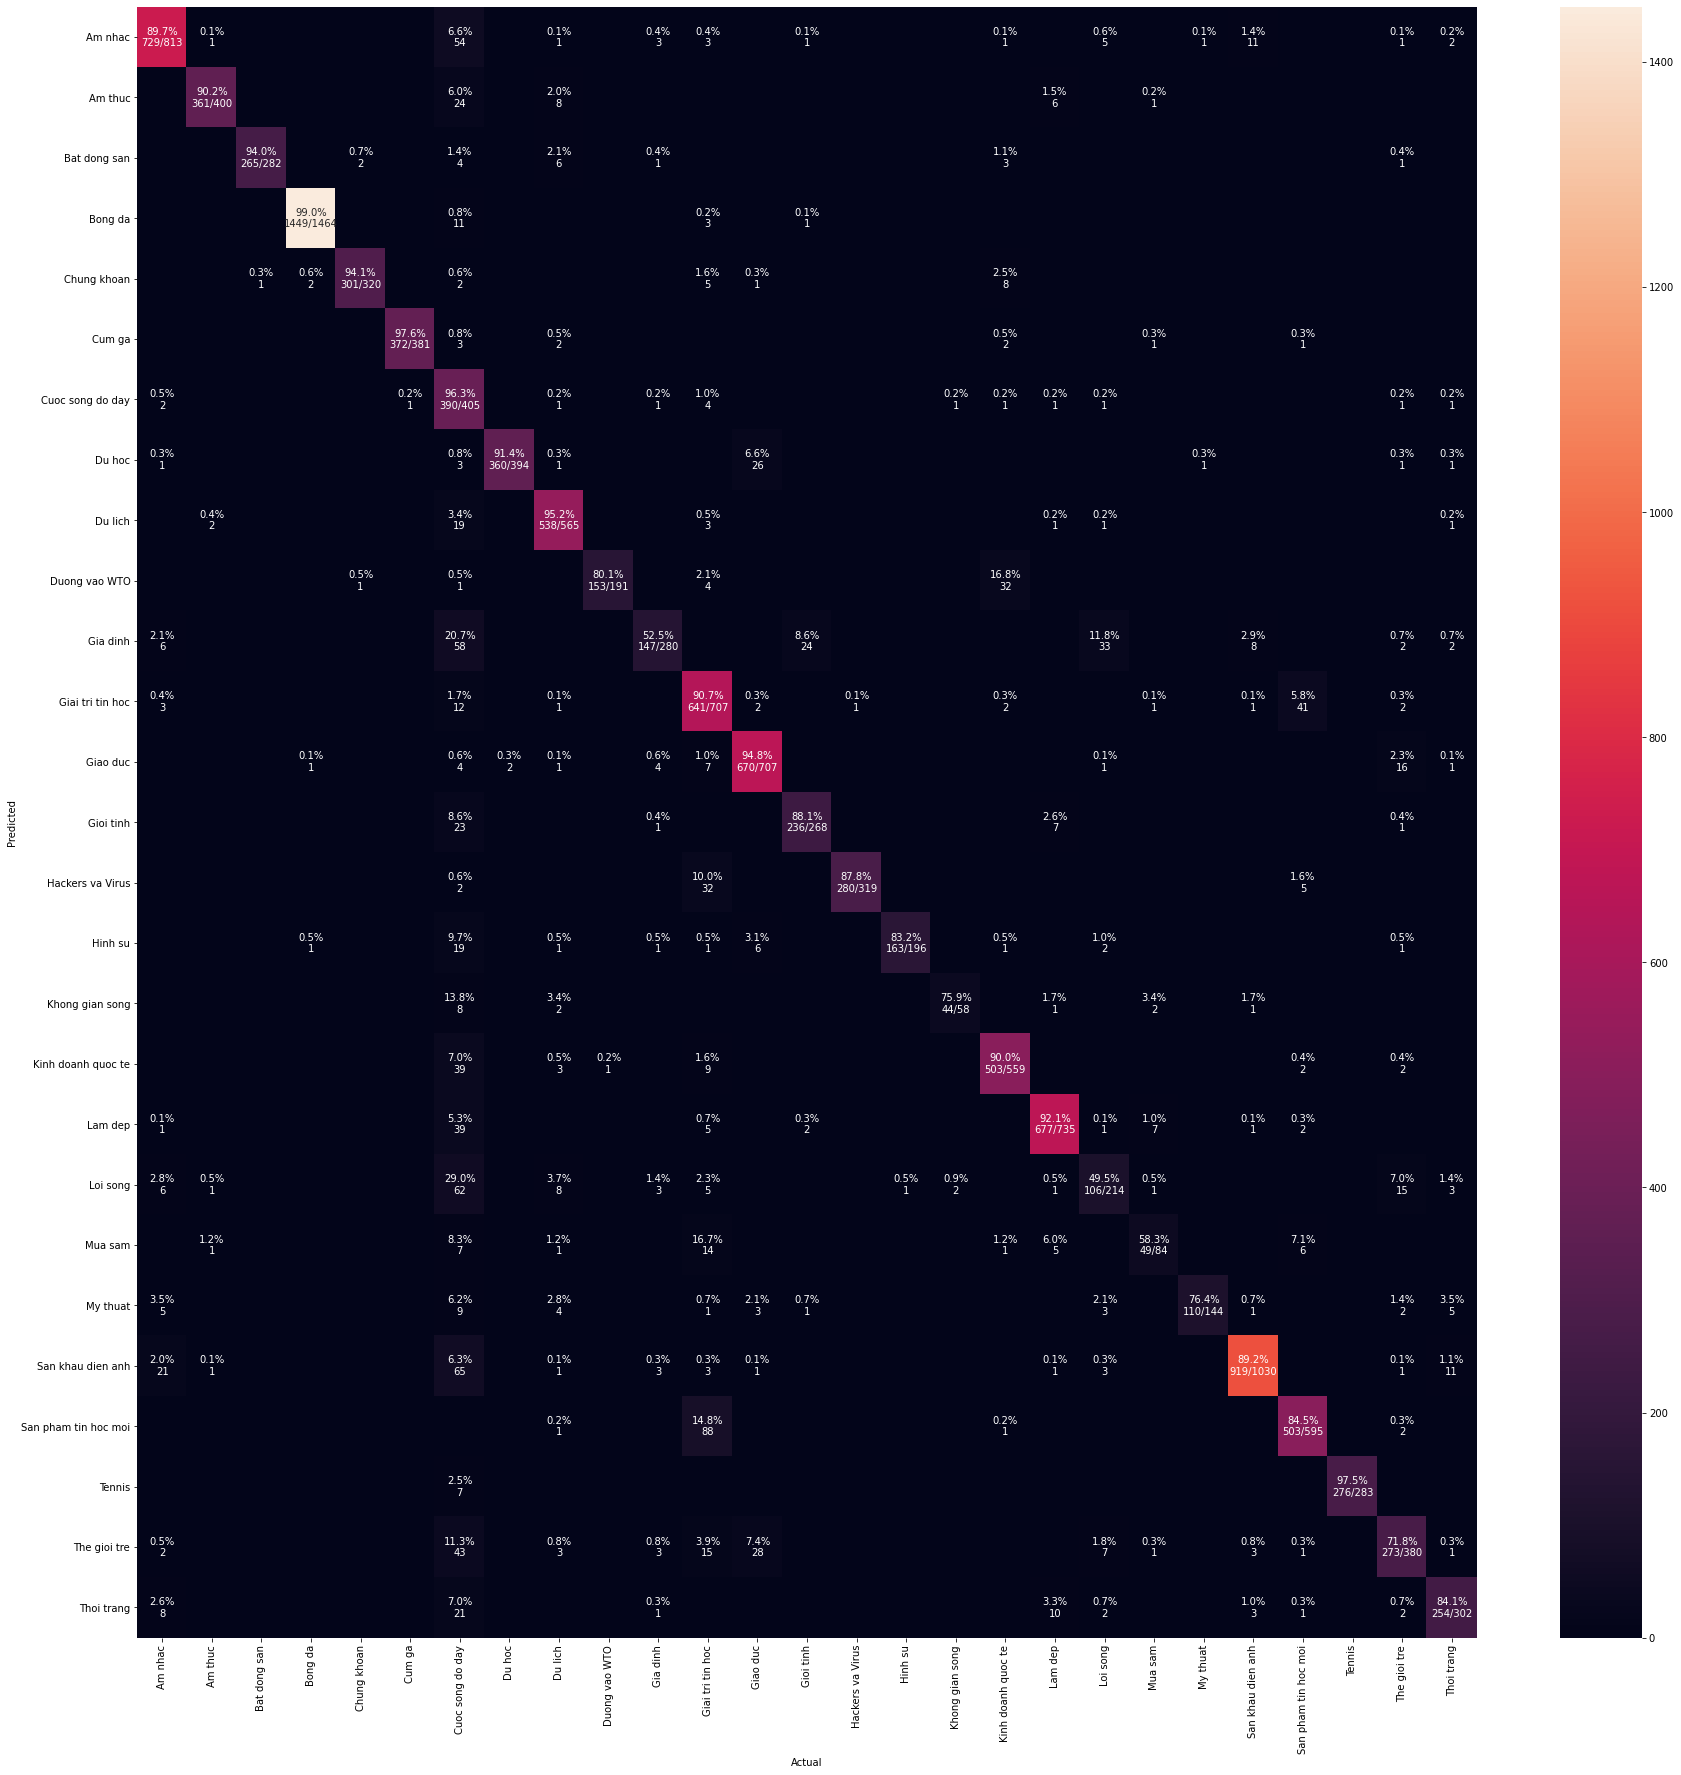

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Predicted'
    cm.columns.name = 'Actual'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax) 

labels = list(set(y_test))

labels.sort()

print(labels)

y_true = y_test_transformed.tolist()
y_pred = test_predictions.tolist()

for i in range(len(y_true)):
  y_pred[i] = labels[y_pred[i]]
  y_true[i] = labels[y_true[i]]

labels = list(labels)
cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(30,30))

In [ ]:
report

,Unnamed: 0,Am nhac,Am thuc,Bat dong san,Bong da,Chung khoan,Cum ga,Cuoc song do day,Du hoc,Du lich,Duong vao WTO,Gia dinh,Giai tri tin hoc,Giao duc,Gioi tinh,Hackers va Virus,Hinh su,Khong gian song,Kinh doanh quoc te,Lam dep,Loi song,Mua sam,My thuat,San khau dien anh,San pham tin hoc moi,Tennis,The gioi tre,Thoi trang
0,Am nhac,729,1,0,0,0,0,54,0,1,0,3,3,0,1,0,0,0,1,0,5,0,1,11,0,0,1,2
1,Am thuc,0,361,0,0,0,0,24,0,8,0,0,0,0,0,0,0,0,0,6,0,1,0,0,0,0,0,0
2,Bat dong san,0,0,265,0,2,0,4,0,6,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0
3,Bong da,0,0,0,1449,0,0,11,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chung khoan,0,0,1,2,301,0,2,0,0,0,0,5,1,0,0,0,0,8,0,0,0,0,0,0,0,0,0
5,Cum ga,0,0,0,0,0,372,3,0,2,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,0,0
6,Cuoc song do day,2,0,0,0,0,1,390,0,1,0,1,4,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1
7,Du hoc,1,0,0,0,0,0,3,360,1,0,0,0,26,0,0,0,0,0,0,0,0,1,0,0,0,1,1
8,Du lich,0,2,0,0,0,0,19,0,538,0,0,3,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
9,Duong vao WTO,0,0,0,0,1,0,1,0,0,153,0,4,0,0,0,0,0,32,0,0,0,0,0,0,0,0,0
